In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function,division

In [8]:
df = pd.read_csv("/Users/chaoxu/code/local-spark/Data/qiancheng_sample_new.csv")

In [10]:
df.os.value_counts()

android    55186
ios        29256
Name: os, dtype: int64

In [11]:
def resample(data, positiveRatio=0.04):
    positive = data[data["label"] == 1]
    negative = data[data["label"] == 0]
    n = int((1 - positiveRatio) / positiveRatio) * positive.shape[0]
    print(n)
    _negative = negative.sample(n=n)
    df = pd.concat([positive, _negative])
    return df

In [12]:
df[['label']]=df[['label']].fillna(0)

In [18]:
df.dtypes

cracked.anomaly           int64
cracked.value              bool
did.15m.anomaly         float64
did.15m.value           float64
did.1d.anomaly          float64
did.1d.value            float64
did.1h.anomaly          float64
did.1h.value            float64
did.1m.anomaly          float64
did.1m.value            float64
did.5m.anomaly          float64
did.5m.value            float64
did.6h.anomaly          float64
did.6h.value            float64
did.7d.anomaly          float64
did.7d.value            float64
event_type               object
idcIP.anomaly             int64
idcIP.value                bool
ipGeo.15m.anomaly       float64
ipGeo.15m.value         float64
ipGeo.1d.anomaly        float64
ipGeo.1d.value          float64
ipGeo.1h.anomaly        float64
ipGeo.1h.value          float64
ipGeo.1m.anomaly        float64
ipGeo.1m.value          float64
ipGeo.5m.anomaly        float64
ipGeo.5m.value          float64
ipGeo.6h.anomaly        float64
                         ...   
ipSeg24.

In [13]:
from datetime import datetime, timedelta
df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
df["timestamp"] = pd.DatetimeIndex(df["timestamp"]) + timedelta(hours=8)
df = df.sort_values(by="timestamp")
df = df.drop(["timestamp","maxent_id","message_timestamp","timestamp",'ipSeg24','ipGeo','event_id','scenario'],axis=1)
df[['label']]=df[['label']].fillna(0)
df[['label']] = df[['label']].astype(int)

In [14]:
import re
anormaly = re.compile('.*anomaly$')
anormaly_match = np.vectorize(lambda x:bool(anormaly.match(x)))
anormaly_cols = df.columns.values[anormaly_match(df.columns.values)]

value = re.compile('.*value$')
value_match = np.vectorize(lambda x:bool(value.match(x)))
value_cols = df.columns.values[value_match(df.columns.values)]

In [15]:
obj_df = df.select_dtypes(include=['object'])

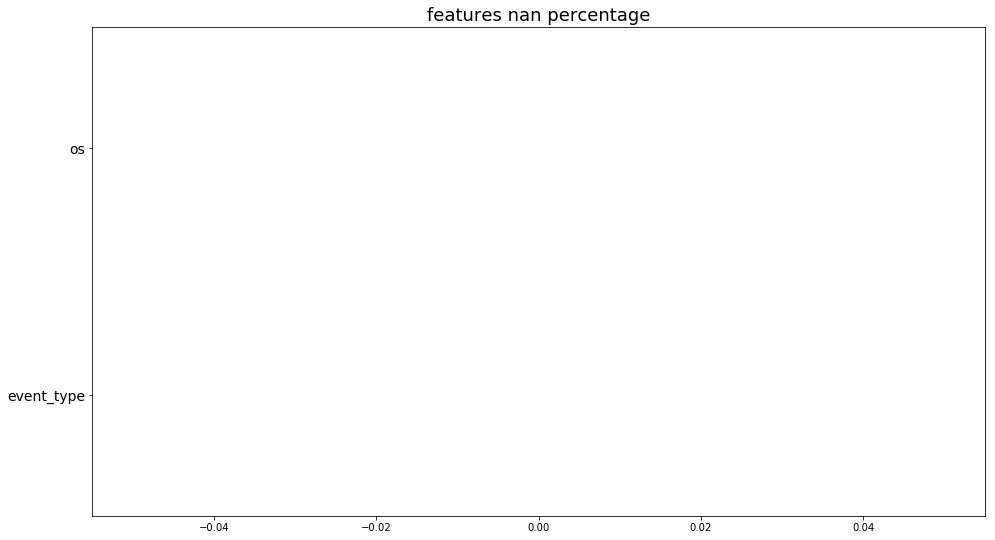

In [16]:
cols = obj_df.columns
fig, ax = plt.subplots(figsize=(16,9))
ax.barh(range(len(cols)),obj_df[cols].isnull().sum()/obj_df.shape[0])
ax.set_yticks(range(len(cols)))
ax.set_yticklabels(cols, size=14)
ax.set_title('features nan percentage',size= 18)
plt.show()

In [17]:
obj_cols = obj_df.columns
obj_cols

Index([u'event_type', u'os'], dtype='object')

In [10]:
df[obj_cols]=df[obj_cols].fillna(False)

In [11]:
df['proxyIP.value'].unique()

array([False, True], dtype=object)

In [12]:
df[anormaly_cols] = df[anormaly_cols].fillna(1)
df[value_cols] = df[value_cols].fillna(1)

In [13]:
count_ = re.compile('.*counts$')
count_match = np.vectorize(lambda x:bool(count_.match(x)))
count_cols = df.columns.values[count_match(df.columns.values)]
df_android_count = df.loc[df.os == 'android'][count_cols]
df_ios_count = df.loc[df.os == 'ios'][count_cols]

In [14]:
# def show_missing():
#     missing = df.columns[df.isnull().any()].tolist()
#     return missing
# df_count[show_missing()].isnull().sum()

整体的label平衡性

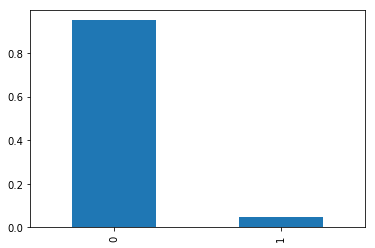

In [19]:
df.label.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [16]:
df_ios = df.loc[df.os == 'ios']

In [17]:
df_ios = resample(df_ios)

22824


In [18]:
df_ios.head(10)

,cracked.anomaly,cracked.value,did.15m.anomaly,did.15m.value,did.1d.anomaly,did.1d.value,did.1h.anomaly,did.1h.value,did.1m.anomaly,did.1m.value,...,proxyIP.value,uaMismatch.anomaly,uaMismatch.value,mcid_counts,imei_counts,mac_counts,aid_counts,idfa_counts,idfv_counts,label
151366,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,2,0,0,0,2,4,1
116682,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,2,0,0,0,2,5,1
101784,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,2,0,0,0,2,4,1
455,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,1,0,0,0,1,4,1
147527,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,2,0,0,0,2,7,1
142905,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,2,0,0,0,2,7,1
88600,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,1,0,0,0,1,21,1
51255,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,2,0,0,0,2,4,1
117515,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,1,0,0,0,1,4,1
164573,1.0,False,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,False,1.0,False,3,0,0,0,2,6,1


In [19]:
df_ios.columns

Index([u'cracked.anomaly', u'cracked.value', u'did.15m.anomaly',
       u'did.15m.value', u'did.1d.anomaly', u'did.1d.value', u'did.1h.anomaly',
       u'did.1h.value', u'did.1m.anomaly', u'did.1m.value', u'did.5m.anomaly',
       u'did.5m.value', u'did.6h.anomaly', u'did.6h.value', u'did.7d.anomaly',
       u'did.7d.value', u'event_type', u'idcIP.anomaly', u'idcIP.value',
       u'ipGeo.15m.anomaly', u'ipGeo.15m.value', u'ipGeo.1d.anomaly',
       u'ipGeo.1d.value', u'ipGeo.1h.anomaly', u'ipGeo.1h.value',
       u'ipGeo.1m.anomaly', u'ipGeo.1m.value', u'ipGeo.5m.anomaly',
       u'ipGeo.5m.value', u'ipGeo.6h.anomaly', u'ipGeo.6h.value',
       u'ipGeo.7d.anomaly', u'ipGeo.7d.value', u'ipSeg24.15m.anomaly',
       u'ipSeg24.15m.value', u'ipSeg24.1d.anomaly', u'ipSeg24.1d.value',
       u'ipSeg24.1h.anomaly', u'ipSeg24.1h.value', u'ipSeg24.1m.anomaly',
       u'ipSeg24.1m.value', u'ipSeg24.5m.anomaly', u'ipSeg24.5m.value',
       u'ipSeg24.6h.anomaly', u'ipSeg24.6h.value', u'ipSeg24.7d.

In [20]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [21]:
df_ios = MultiColumnLabelEncoder(columns = ['cracked.value','idcIP.value','os','proxyIP.value','uaMismatch.value','event_type']).fit_transform(df_ios)

In [22]:
df_ios.head()

,cracked.anomaly,cracked.value,did.15m.anomaly,did.15m.value,did.1d.anomaly,did.1d.value,did.1h.anomaly,did.1h.value,did.1m.anomaly,did.1m.value,...,proxyIP.value,uaMismatch.anomaly,uaMismatch.value,mcid_counts,imei_counts,mac_counts,aid_counts,idfa_counts,idfv_counts,label
151366,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,4,1
116682,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,5,1
101784,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,4,1
455,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,1,0,0,0,1,4,1
147527,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,7,1


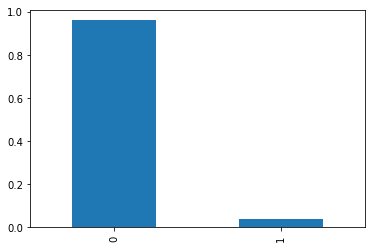

In [23]:
df_ios.label.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [24]:
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing
df_ios[show_missing()].isnull().sum()

Series([], dtype: float64)

In [25]:
# cols = df_ios.columns
# fig, ax = plt.subplots(figsize=(16,9))
# ax.barh(range(len(cols)),df_ios[cols].isnull().sum()/df_ios.shape[0])
# ax.set_yticks(range(len(cols)))
# ax.set_yticklabels(cols, size=14)
# ax.set_title('features nan percentage',size= 18)
# plt.show()

In [26]:
df_ios.drop(['os'],axis=1)

,cracked.anomaly,cracked.value,did.15m.anomaly,did.15m.value,did.1d.anomaly,did.1d.value,did.1h.anomaly,did.1h.value,did.1m.anomaly,did.1m.value,...,proxyIP.value,uaMismatch.anomaly,uaMismatch.value,mcid_counts,imei_counts,mac_counts,aid_counts,idfa_counts,idfv_counts,label
151366,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,4,1
116682,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,5,1
101784,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,4,1
455,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,1,0,0,0,1,4,1
147527,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,7,1
142905,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,7,1
88600,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,1,0,0,0,1,21,1
51255,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,0,0,0,2,4,1
117515,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,1,0,0,0,1,4,1
164573,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,3,0,0,0,2,6,1


In [27]:
df_ios['proxyIP.value'].unique()

array([0, 1])

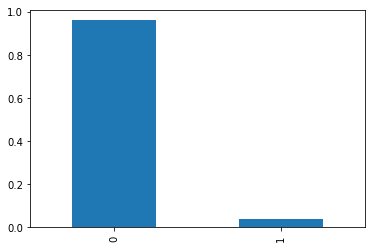

In [28]:
df_ios.label.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [29]:
# X_ios = df_ios.ix[:, df_ios.columns != 'label']
# y_ios = df_ios.ix[:, df_ios.columns == 'label']

In [30]:
from sklearn.cross_validation import train_test_split
def splitData(df, ratio):
    """
    """
    positiveData = df[df["label"] == 1].copy(deep=True)
    _positiveTrain, _positiveTest = train_test_split(positiveData, train_size=ratio)
    negativeData = df[df["label"] == 0].copy(deep=True)
    _negativeTrain, _negativeTest = train_test_split(negativeData, train_size=ratio)
    train_set = pd.concat([_positiveTrain, _negativeTrain])
    test_set = pd.concat([_positiveTest, _negativeTest])
    return train_set, test_set

df_ios_train, df_ios_test = splitData(df_ios,0.3)

X_ios_train = df_ios_train.ix[:, df_ios_train.columns != 'label']
X_ios_test  = df_ios_test.ix[:, df_ios_test.columns != 'label']
y_ios_train = df_ios_train.ix[:, df_ios_train.columns == 'label']
y_ios_test  = df_ios_test.ix[:, df_ios_test.columns == 'label']
print("Number transactions ios train dataset: ", X_ios_train.shape[0])
print("Number transactions ios train dataset: ", y_ios_train.shape[0])
print("Number transactions ios test dataset: ", X_ios_test.shape[0])
print("Total number of ios transactions: ", X_ios_train.size)

Number transactions ios train dataset:  7132
Number transactions ios train dataset:  7132
Number transactions ios test dataset:  16643
Total number of ios transactions:  513504


/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
y_ios_test.label.value_counts()

0    15977
1      666
Name: label, dtype: int64

In [32]:
from __future__ import print_function,division
import itertools
import matplotlib.pylab as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('label 1')
    plt.xlabel('label 0')

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


1198296
16643
Recall metric in the testing dataset:  0.540540540541
Precision metric in the testting dataset: 0.0441446965052
f2 metric in the testting dataset: 6.01055555556


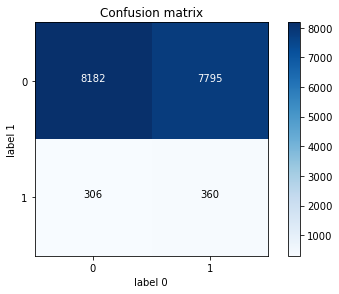

             precision    recall  f1-score   support

          0       0.96      0.51      0.67     15977
          1       0.04      0.54      0.08       666

avg / total       0.93      0.51      0.65     16643



In [33]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,precision_score,classification_report
from sklearn.ensemble import RandomForestClassifier
params = {'max_features':'auto', 'max_depth': 3, 'min_samples_split': 5, \
            'class_weight':'balanced','oob_score':True}
params['n_estimators'] = 2
params['n_jobs'] = 50
forest = RandomForestClassifier(**params)
clf_a = forest.fit(X_ios_train,y_ios_train.values.ravel())
y_ios_pred = clf_a.predict(X_ios_test)

print(X_ios_test.size)
print(y_ios_test.size)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_ios_test,y_ios_pred)
np.set_printoptions(precision=2)
np.set_printoptions(precision=2)
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

print(classification_report(y_ios_test, y_ios_pred, target_names=['0','1']))

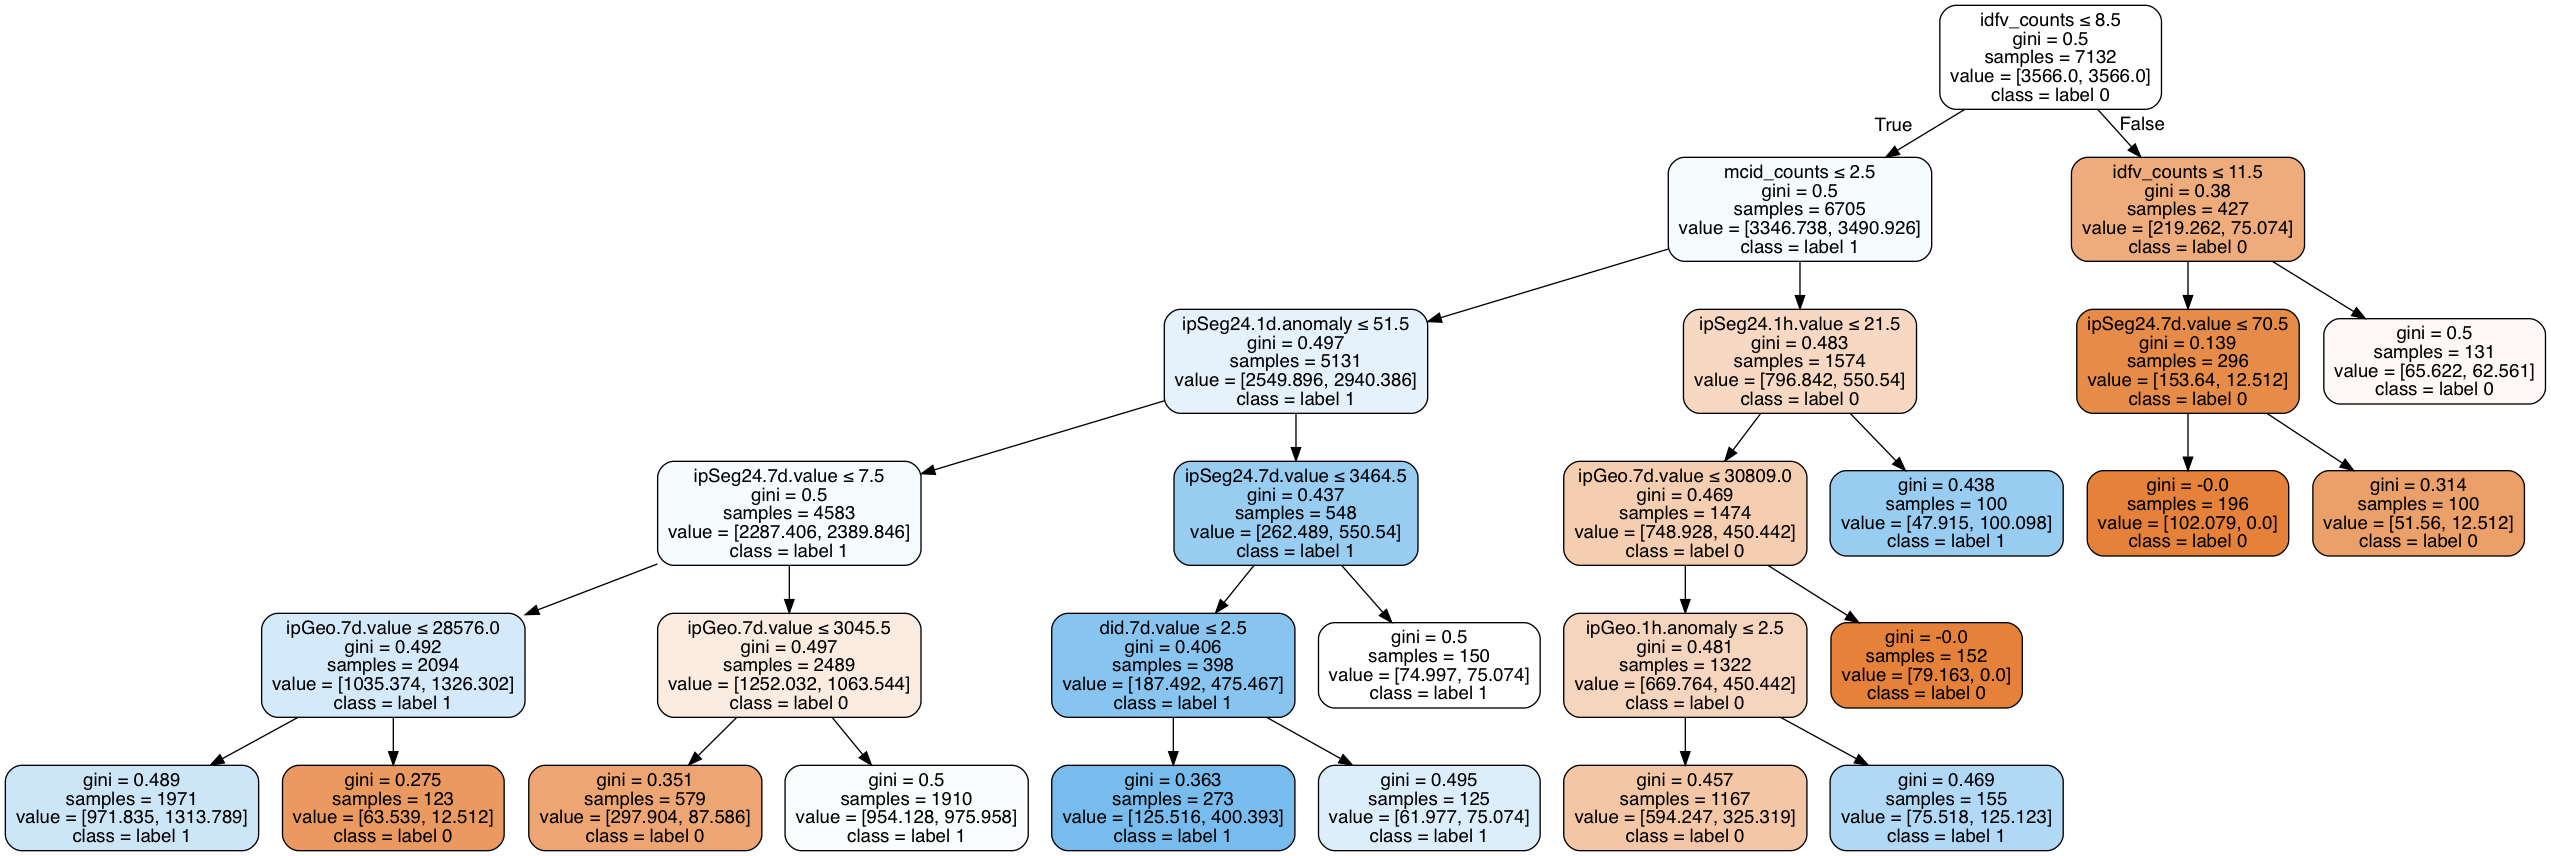

In [34]:
from sklearn import tree
from IPython.display import Image
import pydotplus
clf_ios = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, min_samples_split=100,
    class_weight="balanced", max_leaf_nodes=16)
clf_0 = clf_ios.fit(X_ios_train, y_ios_train)

ios_dot_data = tree.export_graphviz(clf_0, out_file=None, feature_names=X_ios_train.columns,class_names=['label 0','label 1'],\
                               filled=True, rounded=True, special_characters=True, leaves_parallel=False)
graph = pydotplus.graph_from_dot_data(ios_dot_data)
# graph.write_pdf("dec_tree.pdf")
Image(graph.create_png())

In [35]:
y_ios_test.label.value_counts()

0    15977
1      666
Name: label, dtype: int64

1198296
16643
Recall metric in the testing dataset:  0.777777777778
Precision metric in the testting dataset: 0.0466624628412
f2 metric in the testting dataset: 5.31467181467


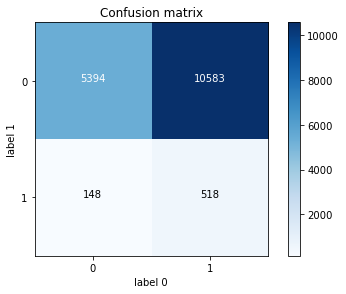

             precision    recall  f1-score   support

          0       0.97      0.34      0.50     15977
          1       0.05      0.78      0.09       666

avg / total       0.94      0.36      0.48     16643



In [36]:
y_ios_pred = clf_0.predict(X_ios_test)

print(X_ios_test.size)
print(y_ios_test.size)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_ios_test,y_ios_pred)
np.set_printoptions(precision=2)
np.set_printoptions(precision=2)
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print(classification_report(y_ios_test, y_ios_pred, target_names=['0','1']))

In [37]:
df_android = df.loc[df.os == 'android']
df_android = MultiColumnLabelEncoder(columns = ['cracked.value','idcIP.value','os','proxyIP.value','uaMismatch.value','event_type']).fit_transform(df_android)

In [38]:
df_android = resample(df_android)
df_android.head()

18336


,cracked.anomaly,cracked.value,did.15m.anomaly,did.15m.value,did.1d.anomaly,did.1d.value,did.1h.anomaly,did.1h.value,did.1m.anomaly,did.1m.value,...,proxyIP.value,uaMismatch.anomaly,uaMismatch.value,mcid_counts,imei_counts,mac_counts,aid_counts,idfa_counts,idfv_counts,label
68901,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,1,1,2,1,0,0,1
26231,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,2,2,2,0,0,1
148672,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,2,2,2,0,0,1
161337,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,2,2,2,0,0,1
147808,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,1.0,0,2,2,2,2,0,0,1


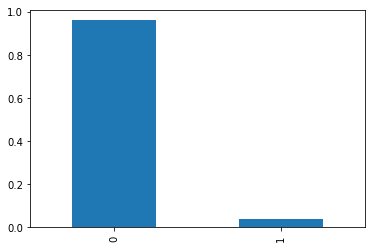

In [39]:
df_android.label.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [40]:
df_android[show_missing()].isnull().sum()

Series([], dtype: float64)

In [41]:
df['proxyIP.value'].value_counts()

False    161458
True      10095
Name: proxyIP.value, dtype: int64

In [42]:
df['proxyIP.value'].unique()

array([False, True], dtype=object)

In [48]:
cols_not_count = df_android.columns.difference(count_cols)
df_android = df_android[cols_not_count]

In [49]:
df_android_train, df_android_test = splitData(df_android,0.3)

X_android_train = df_android_train.ix[:, df_android_train.columns != 'label']
X_android_test  = df_android_test.ix[:,  df_android_test.columns != 'label']
y_android_train = df_android_train.ix[:, df_android_train.columns == 'label']
y_android_test  = df_android_test.ix[:,  df_android_test.columns == 'label']
print("Number transactions android train dataset: ", X_android_train.shape[0])
print("Number transactions android train dataset: ", y_android_train.shape[0])
print("Number transactions android test dataset: ", X_android_test.shape[0])
print("Total number of android transactions: ", X_android_train.size)

Number transactions android train dataset:  5729
Number transactions android train dataset:  5729
Number transactions android test dataset:  13371
Total number of android transactions:  378114


In [50]:
 y_android_test.label.value_counts()

0    12836
1      535
Name: label, dtype: int64

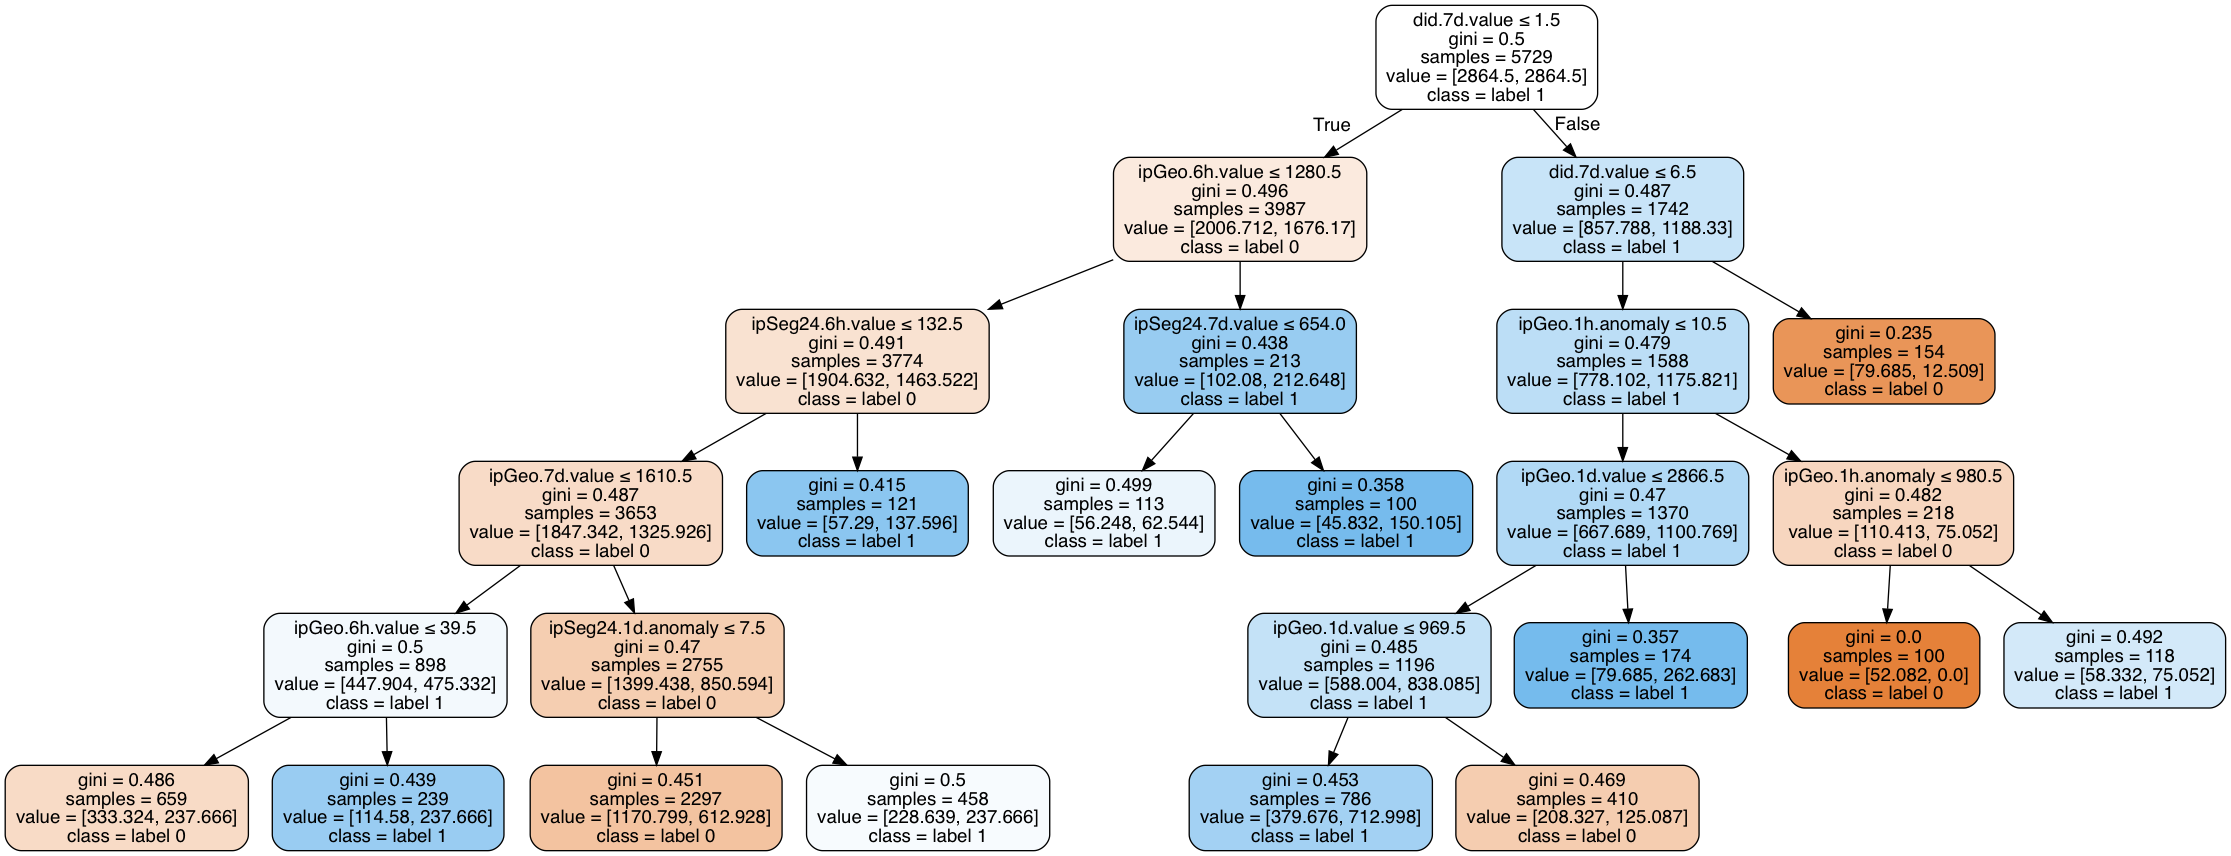

In [51]:

clf_android = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=100, min_samples_split=100,
    class_weight="balanced", max_leaf_nodes=16)
clf_1 = clf_android.fit(X_android_train, y_android_train)

dot_data_android = tree.export_graphviz(clf_1, out_file=None, feature_names=X_android_train.columns,class_names=['label 0','label 1'],\
                               filled=True, rounded=True, special_characters=True, leaves_parallel=False)
graph = pydotplus.graph_from_dot_data(dot_data_android)
# graph.write_pdf("dec_tree.pdf")
Image(graph.create_png())

882486
13371
Recall metric in the testing dataset:  0.457943925234
Precision metric in the testting dataset: 0.0479170741248
f2 metric in the testting dataset: 5.92081632653


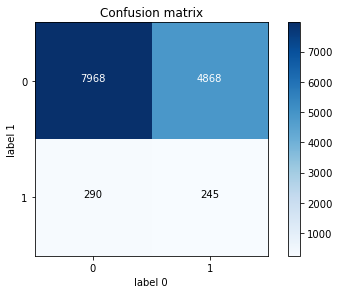

             precision    recall  f1-score   support

          0       0.96      0.62      0.76     12836
          1       0.05      0.46      0.09       535

avg / total       0.93      0.61      0.73     13371



In [52]:
y_android_pred = clf_1.predict(X_android_test)

print(X_android_test.size)
print(y_android_test.size)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_android_test,y_android_pred)
np.set_printoptions(precision=2)
np.set_printoptions(precision=2)
recall = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f2 = 0.2*(4/recall + 1/precision)
print("Recall metric in the testing dataset: ", recall)
print("Precision metric in the testting dataset:", precision)
print("f2 metric in the testting dataset:", f2)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
print(classification_report(y_android_test, y_android_pred, target_names=['0','1']))

In [47]:
print(df_android_count.shape)
print(df_ios_count.shape)
print(df_android.shape)
df_android_count.head()

(90275, 6)
(81278, 6)
(19100, 73)


,mcid_counts,imei_counts,mac_counts,aid_counts,idfa_counts,idfv_counts
108487,2,2,1,2,0,0
123914,2,1,2,1,0,0
127063,3,3,1,3,0,0
130907,2,2,2,2,0,0
134385,1,1,1,2,0,0
